# Práctica 5: Grafos

Para ayudarse a resolver, leer la documentación del paquete [networkx](https://networkx.org/documentation/stable/reference/index.html)

Los ejercicios están inspirados de la sección de grafos de [CSES](https://cses.fi/problemset/list/)

In [ ]:
!pip install pytest
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Ejercicio 1**: Construir los grafos $P_4, C_4, W_5, K_5, K_{2,3}$ programáticamente con el módulo `networkx`, y pedirle la construcción de sus matrices de adyacencia e incidencia donde:

- $P_n$ es el grafo camino $n$ vértices
- $C_n$ es el grafo ciclo de $n$ vértices
- $W_n$ es el grafo rueda de $n$ vértices
- $K_n$ es el grafo completo $n$ vértices
- $K_{n,m}$ es el grafo bipartito completo $n$ y $m$ vértices

In [3]:
import networkx as nx
from itertools import product
import matplotlib.pyplot as plt


P = nx.Graph()
P.add_nodes_from([1,2,3,4])
P.add_edges_from([(1,2), (2,3), (3,4)])


P4

In [ ]:
P.number_of_nodes()
list(P.nodes)

[1, 2, 3, 4]

In [ ]:
P.number_of_edges()
list(P.edges)

[(1, 2), (2, 3), (3, 4)]

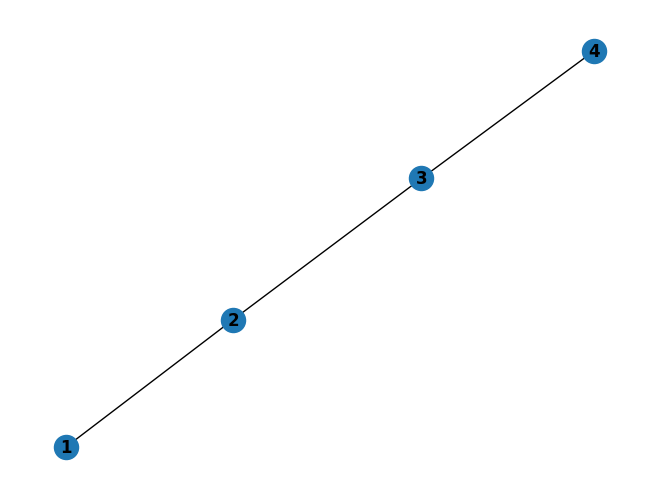

In [ ]:
nx.draw(P, with_labels=True, font_weight='bold')

C4

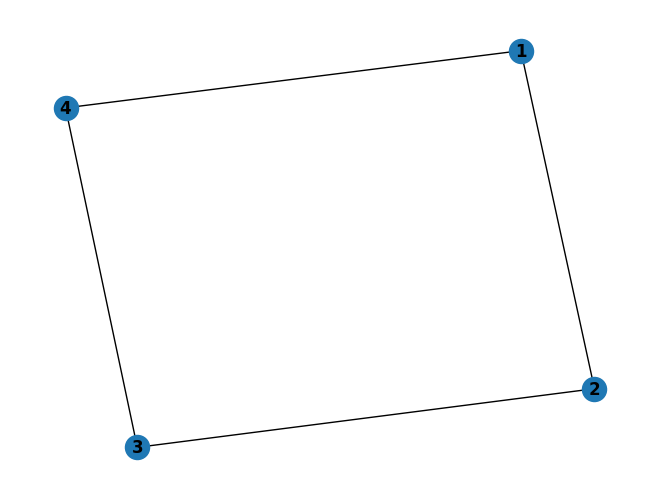

In [ ]:
C = nx.Graph()
C.add_nodes_from([1,2,3,4])
C.add_edges_from([(1,2), (2,3), (3,4), (1,4)])
nx.draw(C,with_labels=True, font_weight='bold')

W5

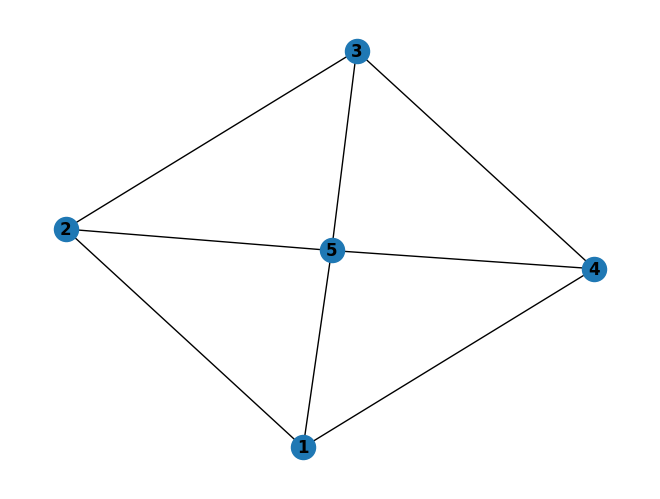

In [ ]:
W = nx.Graph()
W.add_nodes_from([1,2,3,4,5])
W.add_edges_from([(1,2), (2,3), (3,4), (4,1), (1,5), (2,5), (3,5), (4,5)])
nx.draw(W, with_labels=True, font_weight='bold')

K5

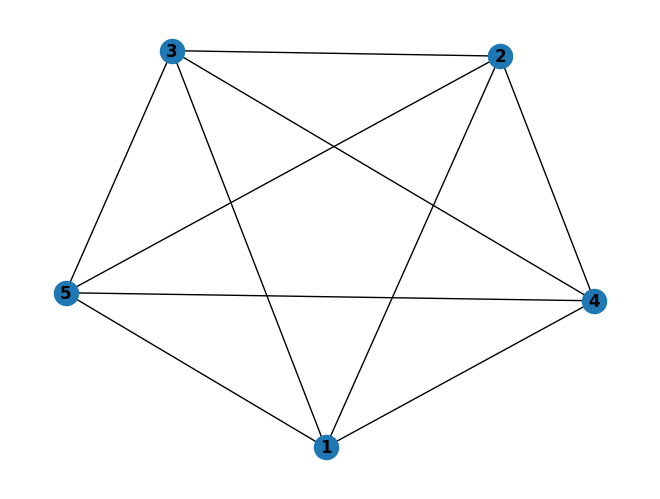

In [ ]:
K = nx.Graph()
K.add_nodes_from([1,2,3,4,5])
K.add_edges_from([(1,2), (2,3), (3,4), (4,5), (5,1), (1,3), (1,4), (2,4), (2,5), (3,5)])
nx.draw(K, with_labels=True, font_weight='bold')

Knm

In [ ]:
K = nx.Graph()
K.add_nodes_from([1,2,3,4,5])
K.add_edges_from([(1,2), (2,3), (3,4), (4,5), (5,1), (1,3), (1,4), (2,4), (2,5), (3,5)])
nx.draw(K, with_labels=True, font_weight='bold')

Para los siguiente ejercicios, puede utilizar la siguiente clase si la necesita

In [ ]:
from math import sqrt

class Grid:
  def __init__(self, string, ancho, alto):
    raw_split = string.replace("\n", " ").replace("\t", " ").split(" ")

    self.cells = [symbol for symbol in raw_split if symbol != ""]
    self.ancho = ancho
    self.alto = alto
    
  def at(self, x, y):
    assert 0 <= x < self.ancho
    assert 0 <= y < self.alto
    return self.cells[x + self.ancho * y]

**Ejercicio 2**: Se le da un mapa de un edificio y su tarea es contar el número de habitaciones. El tamaño del mapa es de $n \times m$ cuadrados, y cada cuadrado es piso o pared. Puede caminar hacia la izquierda, derecha, arriba y abajo a través de los cuadrados del piso. Los pisos serán ' . ' y las paredes ' * '.

En el siguiente ejemplo hay 3 habitaciones:
```
# # # # # # # #
# . . # . . . #
# # # # . # . #
# . . # . . . #
# # # # # # # #
```

_Inspirado en [Counting Rooms](https://cses.fi/problemset/task/1192)_


In [ ]:
import networkx as nx
from itertools import product

grid = Grid("""
    # # # # # # # #
    # . . # . . . #
    # # # # . # . #
    # . . # . . . #
    # # # # # # # #
  """, ancho = 8, alto = 5)

# ...


**Ejercicio 3**: Se nos da un mapa de un laberinto, donde hay que encontrar un camino de principio a fin. Se puede caminar hacia la izquierda, derecha, arriba y abajo. A es el inicio y B es el final.

Imprima la ruta más corta. Puede imprimir cualquier solución válida.

En el siguiente ejemplo el camino va izquierda, abajo, derecha al fondo y arriba:
```
# # # # # # # #
# . A # . . . #
# . # # . # B #
# . . . . . . #
# # # # # # # #
```

_Inspirado en [Labyrinth](https://cses.fi/problemset/task/1193)_


In [ ]:

import networkx as nx
from itertools import product

grid = Grid("""
    # # # # # # # #
    # . A # . . . #
    # . # # . # B #
    # . . . . . . #
    # # # # # # # #
  """, ancho = 8, alto = 5)

# ...

**Definicion** Un multigrafo dirigido, también llamado a veces multidigrafo, es un grafo dirigido donde se consideran el sentido de las aristas (como en un grafo dirigido). Formalmente es un par ordenado G = (V, E) donde V es el conjunto de vertices y E es un multiconjunto de aristas donde cada arista es un par ordenado de vertices. Utilice este concepto para resolver el siguiente problema.

**Ejercicio 4**: Hay ciudades numeradas con conexiones de vuelos entre ellas. Determine la longitud de la ruta más corta desde la ciudad 1 a todas las ciudades.

Cada conexión de vuelo cuenta con ciudad origen, ciudad destino y longitud de la ruta. Puede haber más de una conexión entre un par de ciudades, y las conexiones no son bidireccionales.

Puede suponer que se puede llegar a todas las ciudades.

En el siguiente ejemplo, los caminos más cortos son: 0 para la ciudad 1, 5 para la ciudad 2 y 2 para la ciudad 3:
```
1 2 6
1 3 2
3 2 3
1 3 4
```

_Inspirado en [Shortest Routes I](https://cses.fi/problemset/task/1671)_


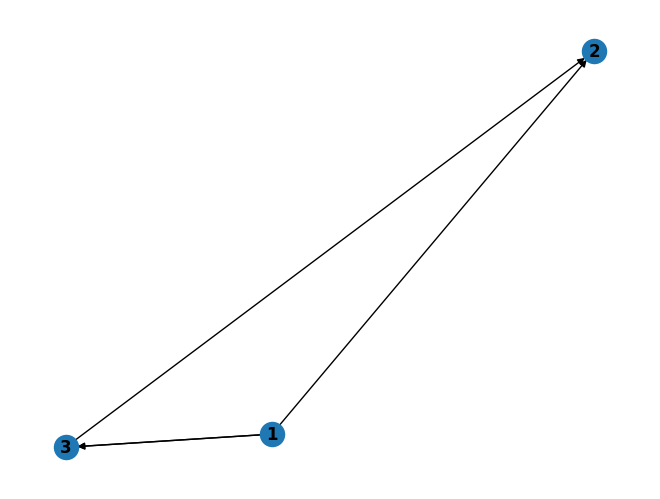

In [11]:
import networkx as nx
from itertools import product

class MultiDiGraph():
    G = nx.MultiDiGraph()
    G.add_nodes_from([1,2,3])
    G.add_edge(1, 2, weight = 6)
    G.add_edge(1, 3, weight = 2)
    G.add_edge(3, 2, weight = 3)
    G.add_edge(1, 3, weight = 4)

    nx.draw(G, with_labels=True, font_weight='bold')

    #print (nx.shortest_path(G, source="1", target = "2", weight = "weight"))

# nx.single_source_dijkstra() usar este

**Ejercicio 5**: Hay ciudades conectadas por caminos. Desafortunadamente, el estado de las carreteras es tan malo que no se pueden utilizar. Tu tarea es reparar algunas de las carreteras para que haya una ruta decente entre dos ciudades.

Para cada camino, se conoce su costo de reparación. Encuentre una solución donde el costo total sea lo más pequeño posible.

Todos los caminos son de doble sentido. Todo camino esta entre dos ciudades diferentes, y como máximo hay un camino entre dos ciudades.

En el siguiente ejemplo, la solución es 14:
```
1 2 3
2 3 5
2 4 2
3 4 8
5 1 7
5 4 4
```

_Inspirado en [Road Reparation](https://cses.fi/problemset/task/1675)_

In [ ]:
import networkx as nx
from itertools import product

# ... usar  nx.minimum_sparning.tree()

Ejercicio 6: Realice una función que dado un grafo, cuente el número de nodos y aristas que tiene el grafo. No utlice los metodos `number_of_nodes` ni `number_of_edges`. Al finalizar, utilice estos metodos para verificar que su implementación es correcta. 

In [ ]:
import networkx as nx
from itertools import product

# ... iterar por los nodos y aristas: for n in G.nodes 

Ejercicio 7: Realice una función que dado un grafo, muestre su matriz de adyacencia como una lista de listas. No utlice el metodo `adjacency_matrix`. Al finalizar, utilice el metodo `adjacency_matrix` para comprobar que su implementacion es correcta.

In [ ]:
import networkx as nx
from itertools import product

# ...

**Definicion** El **diametro** de un grafo conexo con o sin pesos es la mayor longitud posible del camino mas corto entre dos nodos cualesquiera. Por ejemplo, el diametro de $K_n$, el grafo completo de n vertices, es siempre 1, pues entre cualesquiera par de nodos siempre hay una arista. 

Ejercicio 8: Realice una función que dado un grafo calcule su diametro.

In [ ]:
import networkx as nx
from itertools import product

# ...

Ejercicio 9: ¿Cual es el diametro del grafo $K_{n,m}$? Justifique su respuesta.